In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

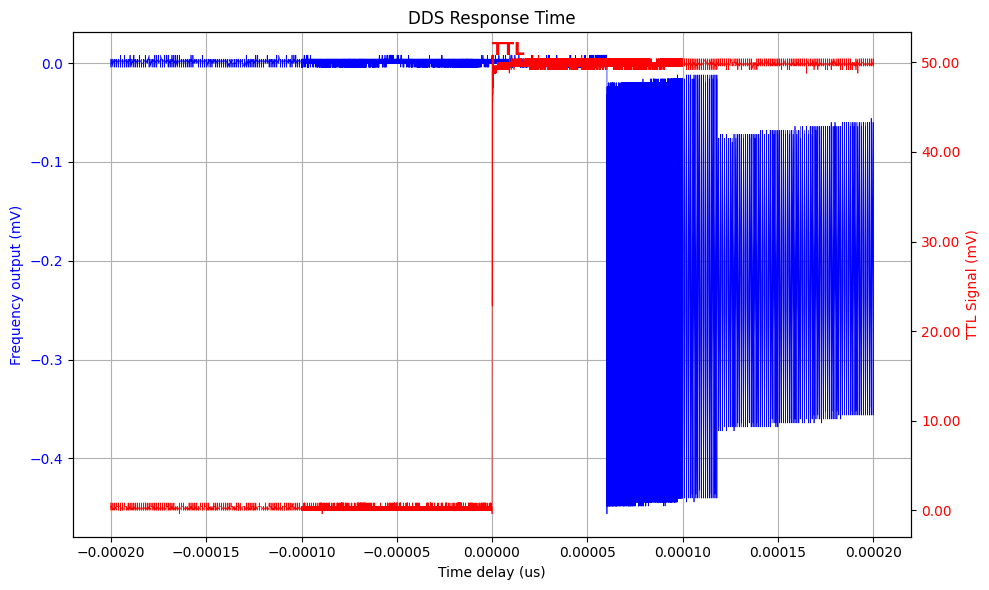

In [75]:
# Read the CSV files
channel_1 = pd.read_csv('dat/U001.csv', header=None, names=['Time', 'Amplitude_Channel_1'])
channel_2 = pd.read_csv('dat/U003.csv', header=None, names=['Time', 'Amplitude_Channel_2'])

channel_2['Amplitude_Channel_2'] = channel_2['Amplitude_Channel_2'] * 0.01

start_time = -0.0002
end_time = 0.0002

channel_1 = channel_1[(channel_1['Time'] >= start_time) & (channel_1['Time'] <= end_time)]
channel_2 = channel_2[(channel_2['Time'] >= start_time) & (channel_2['Time'] <= end_time)]

n = 1  # Adjust this factor based on the density of your data
channel_1_downsampled = channel_1.iloc[::n, :]
channel_2_downsampled = channel_2.iloc[::n, :]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

def restore_unscaled_labels(x, pos):
    return f'{x / 0.01:.2f}'

# Plot Channel 1 on the primary y-axis
ax1.plot(channel_1_downsampled['Time'], channel_1_downsampled['Amplitude_Channel_1'], color='blue', label='Channel 1', linewidth=0.5)
ax1.set_xlabel('Time delay (us)')
ax1.set_ylabel('Frequency output (mV)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(channel_2_downsampled['Time'], channel_2_downsampled['Amplitude_Channel_2'], color='red', label='Channel 2 (scaled by 0.25)', linewidth=0.5)
ax2.set_ylabel('TTL Signal (mV)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.yaxis.set_major_formatter(plt.FuncFormatter(restore_unscaled_labels))

# Adding annotations based on relative positions
max_amplitude_channel_1 = channel_1_downsampled['Amplitude_Channel_1'].max()
max_time_channel_1 = channel_1_downsampled.loc[channel_1_downsampled['Amplitude_Channel_1'].idxmax(), 'Time']

max_amplitude_channel_2 = channel_2_downsampled['Amplitude_Channel_2'].max()
max_time_channel_2 = channel_2_downsampled.loc[channel_2_downsampled['Amplitude_Channel_2'].idxmax(), 'Time']

plt.text(max_time_channel_2, max_amplitude_channel_2, 'TTL', color='red', fontsize=12, fontweight='bold')

# Add title and legend
plt.title('DDS Response Time')
fig.tight_layout()  # Ensure everything fits without overlapping

# Show the plot
plt.show()


Text(0.5, 1.0, 'DDS Frequency Feed (200MHz)')

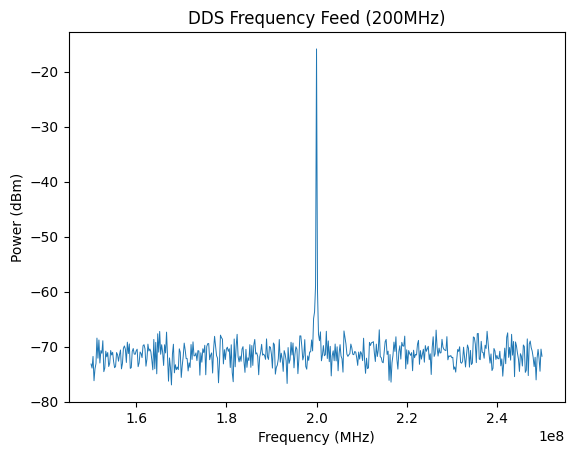

In [51]:
SA = pd.read_csv('dat/9958_200MHz_SA.CSV', header=None, names=['Frequency', 'Amplitude'])

plt.plot(SA.Frequency, SA.Amplitude, linewidth=0.7)
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.title('DDS Frequency Feed (200)')

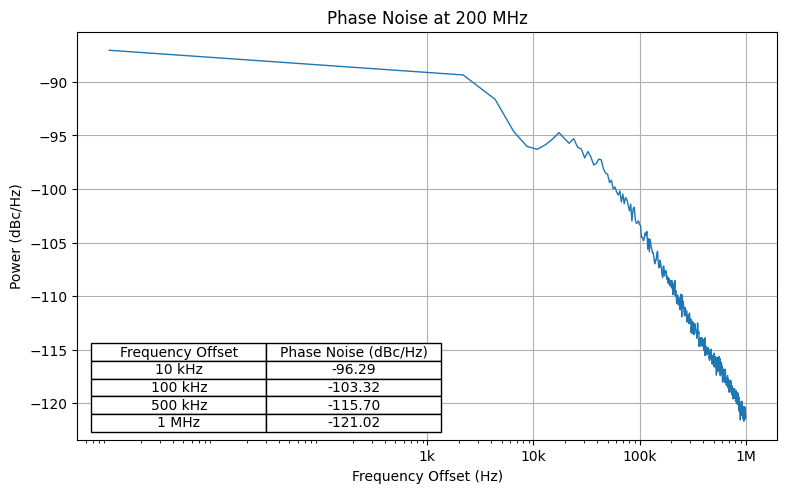

In [72]:
# Load the data
PN = pd.read_csv("dat/9958_200MHz_PHN.CSV", skiprows=42, header=None, usecols=[0,1], names=['Offset', 'Amplitude'])

# Define the offsets of interest
offsets_of_interest = [10e3, 100e3, 500e3, 1e6]

# Find the phase noise values at the specified offsets
phase_noise_values = []
for offset in offsets_of_interest:
    closest_index = (PN.Offset - offset).abs().idxmin()
    phase_noise_values.append(PN.loc[closest_index, 'Amplitude'])

# Format the offsets for display in the table
formatted_offsets = ["{:.0f} kHz".format(offset/1e3) if offset < 1e6 else "{:.0f} MHz".format(offset/1e6) for offset in offsets_of_interest]

# Create a dictionary to use for the table
data = {'Frequency Offset': formatted_offsets, 'Phase Noise (dBc/Hz)': phase_noise_values}
df = pd.DataFrame(data)

# Plot the phase noise
plt.figure(figsize=(10, 6))
plt.plot(PN.Offset, PN.Amplitude, linewidth=1)
plt.grid(True)
plt.ylabel('Power (dBc/Hz)')
plt.xlabel('Frequency Offset (Hz)')
plt.title('Phase Noise at 200 MHz')
plt.xscale('log')
plt.xticks([1e3, 1e4, 1e5, 1e6], ['1k', '10k', '100k', '1M'])

# Add the table
cell_text = []
for row in range(len(df)):
    cell_text.append([df["Frequency Offset"][row], f'{df["Phase Noise (dBc/Hz)"][row]:.2f}'])

table = plt.table(cellText=cell_text, colLabels=df.columns, cellLoc='center', loc='lower left', zorder=3)
table.scale(0.5, 1.2)  # Scale the table to fit in the plot
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(left=0.2, bottom=0.2)  # Adjust plot to fit the table
plt.show()
